<a href="https://colab.research.google.com/github/anesz271/horse_or_human/blob/main/horse_or_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
# download the data

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-02-08 13:57:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.128, 74.125.143.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  41.0MB/s    in 3.5s    

2021-02-08 13:57:08 (41.0 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-02-08 13:57:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')
train_horse_names = os.listdir('/tmp/horse-or-human/horses')
print(train_horse_names[:10])
train_human_names = os.listdir('/tmp/horse-or-human/humans')
print(train_human_names[:10])
validation_horse_hames = os.listdir('/tmp/validation-horse-or-human/horses')
print(validation_horse_hames[:10])
validation_human_names = os.listdir('/tmp/validation-horse-or-human/humans')
print(validation_human_names[:10])

['horse46-7.png', 'horse05-3.png', 'horse16-3.png', 'horse45-4.png', 'horse24-5.png', 'horse48-4.png', 'horse09-5.png', 'horse12-0.png', 'horse31-6.png', 'horse46-6.png']
['human09-20.png', 'human08-06.png', 'human01-19.png', 'human04-21.png', 'human07-03.png', 'human12-10.png', 'human01-08.png', 'human08-18.png', 'human15-17.png', 'human06-10.png']
['horse1-484.png', 'horse4-159.png', 'horse2-040.png', 'horse3-255.png', 'horse4-188.png', 'horse4-503.png', 'horse3-198.png', 'horse2-069.png', 'horse5-076.png', 'horse3-099.png']
['valhuman01-23.png', 'valhuman03-03.png', 'valhuman04-14.png', 'valhuman03-21.png', 'valhuman04-16.png', 'valhuman05-22.png', 'valhuman05-01.png', 'valhuman01-01.png', 'valhuman01-14.png', 'valhuman05-18.png']


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # the input shape is the desired size of the image with 3 bytes color
    # the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # 1 output neuron. it will contain a value from 0-1 where 0 is for one class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

In [ ]:
# organize data into generators

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# all images will be augmented according to whichever lines are uncommented below.
train_datagen = ImageDataGenerator(
      rescale=1./255,
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      #fill_mode='nearest'
      )

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human',
        target_size=(300, 300),
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
# training the model

history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data=validation_generator)

Epoch 1/15
8/8 [==============================] - 81s 10s/step - loss: 2.2477 - acc: 0.4940 - val_loss: 0.9727 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 91s 11s/step - loss: 0.7132 - acc: 0.5910 - val_loss: 2.2500 - val_acc: 0.5000
Epoch 3/15
8/8 [==============================] - 80s 10s/step - loss: 0.9899 - acc: 0.5950 - val_loss: 5.2792 - val_acc: 0.5000
Epoch 4/15
8/8 [==============================] - 80s 10s/step - loss: 0.9494 - acc: 0.6713 - val_loss: 2.2140 - val_acc: 0.6016
Epoch 5/15
8/8 [==============================] - 78s 10s/step - loss: 0.2715 - acc: 0.8869 - val_loss: 1.0831 - val_acc: 0.8438
Epoch 6/15
8/8 [==============================] - 79s 10s/step - loss: 0.1441 - acc: 0.9418 - val_loss: 2.1584 - val_acc: 0.6875
Epoch 7/15
8/8 [==============================] - 79s 10s/step - loss: 0.5045 - acc: 0.8415 - val_loss: 1.2835 - val_acc: 0.7812
Epoch 8/15
8/8 [==============================] - 79s 10s/step - loss: 0.3598 - acc: 0.9094 - val

In [ ]:
# run the model
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn # upload a picture from your library
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving canadian-singer-leonard-cohen-smokes-a-cigarette-during-a-press-conference-H8DHEE.jpg to canadian-singer-leonard-cohen-smokes-a-cigarette-during-a-press-conference-H8DHEE.jpg
[[0.]]
[0.]
canadian-singer-leonard-cohen-smokes-a-cigarette-during-a-press-conference-H8DHEE.jpg is a horse


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


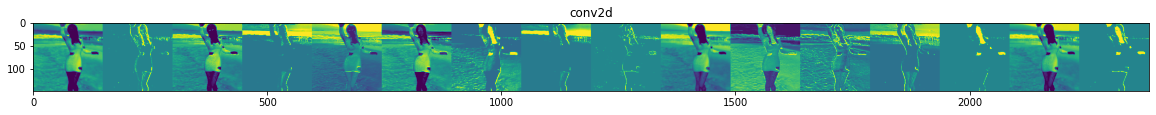

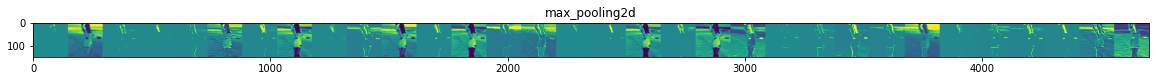

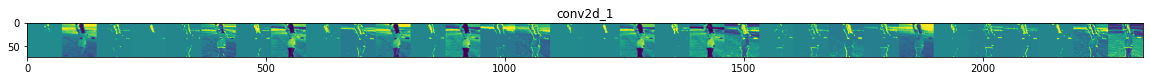

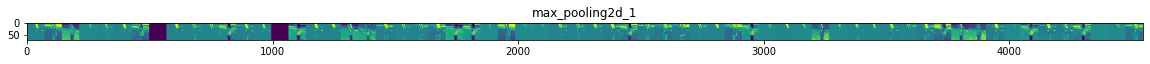

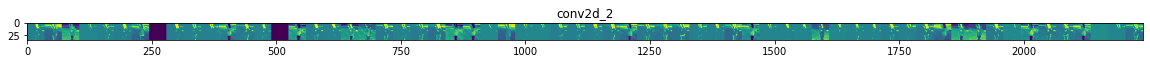

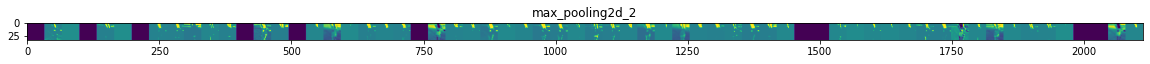

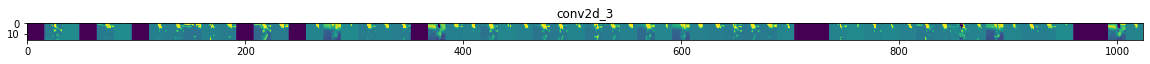

In [ ]:
# visualizing the model layers
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# prepare a random input image from the training set
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # a PIL image
x = img_to_array(img)  # numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # numpy array with shape (1, 300, 300, 3)

# rescale by 1/255
x /= 255

# run the image through our network
successive_feature_maps = visualization_model.predict(x)

# the names of the layers
layer_names = [layer.name for layer in model.layers]

# display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]  # number of features in feature map
    # feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # tile images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
# clean up
import os, signal
os.kill(os.getpid(), signal.SIGKILL)